In [33]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display

sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="deep",
)

When you are searching for a new job, its helpful to have more than one offer on the table so you can use it in negotiations. If you have a 1/5 probablity of receiving a job offer when you interview, and you interview with 7 companies in a month, what is the probability you'll have at least two competing offers by the end of that month?

- Is this discrete? yes
- is this binary? Yes
- Distribution: binomial

,# of Job Offers,CDF,PMF
0,0,0.209715,0.209715
1,1,0.576717,0.367002
2,2,0.851968,0.275251
3,3,0.966656,0.114688
4,4,0.995328,0.028672
5,5,0.999629,0.004301
6,6,0.999987,0.000358
7,7,1.000000,0.000013


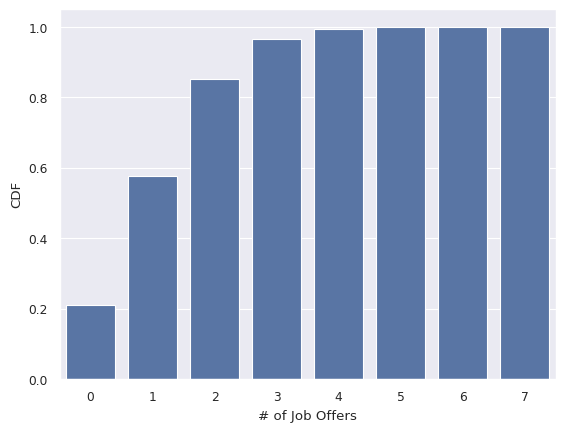

In [34]:
n = 7
p_joboffer = 0.2
dist_of_joboffers = stats.binom(n, p_joboffer)

# CDF graph
df = pd.DataFrame(
    {
        '# of Job Offers': range(n+1),
        'CDF': dist_of_joboffers.cdf(range(n+1)),
        'PMF': dist_of_joboffers.pmf(range(n+1))
    }
)
sns.barplot(data = df, x = '# of Job Offers', y = 'CDF')
display(df)

# PMF = P(X=x)
# CDF = P(X<=x)


<Axes: xlabel='# of Job Offers', ylabel='PMF'>

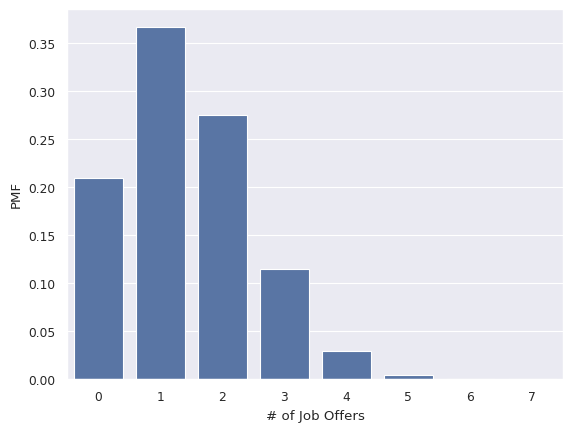

In [35]:
# PMF plot
sns.barplot(data = df, x = '# of Job Offers', y = 'PMF')

CDF @ N-1 = 0.5767167999999998
CDF @ N = 0.851968
0.4232832000000002
0.4232832000000001


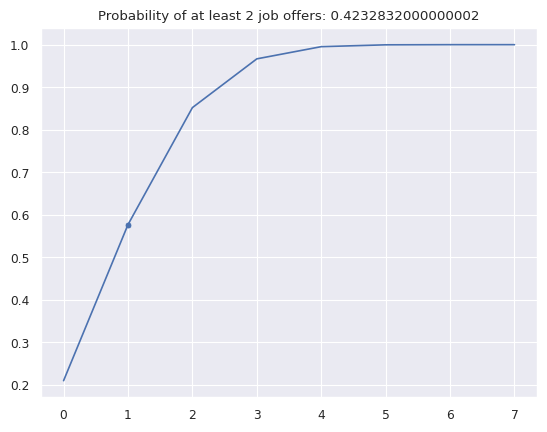

In [36]:
min_n = 2

# prob of at least min_n job offers 
p_at_least_min_n = 1 - dist_of_joboffers.cdf(min_n-1)
print(f"CDF @ N-1 = {dist_of_joboffers.cdf(min_n-1)}")
print(f"CDF @ N = {dist_of_joboffers.cdf(min_n)}")
print(p_at_least_min_n)
# plot of CDF with min_n-1 as a line 

sns.lineplot(x=range(n+1), y=dist_of_joboffers.cdf(range(n+1)))
sns.scatterplot(x=[min_n-1], y=[dist_of_joboffers.cdf(min_n-1)])
plt.title(f"Probability of at least {min_n} job offers: {p_at_least_min_n}")

# compute using pmf
p_at_least_min_n = 1 - sum(dist_of_joboffers.pmf(range(min_n)))
print(p_at_least_min_n)
